# BMEN 509 - Laboratory 2 - Frequency Domain
The purpose of this laboratory is to become familiar with the frequency domain representation of
images. In this exercise, you will demonstrate 1) a basic understanding of the frequency domain, 2)
understanding the inverse discrete Fourier transform, and 3) frequency domain filtering.

Your rubric is as follows:
<img src="NotebookImages/Rubric2.png" alt="Rubric" width="600"/>

Please use this notebook to complete your assignment. Sections to be completed are blank and are marked by `TODO`. Please upload the notebook (.ipynb) and as a PDF (.pdf) by using File > Download as > PDF via LaTeX.

TODO: Bryce A. Besler, November 19th, 2018

### Objective
## The objective of this lab was to get very familar with Fourier Transforms. Particularly exploring the various components of the Fourier transform such as the Real, Imagniary, Magnitude, and Phase Components. Throughout this lab we engaged in various exercises to help us become more familar with the Fourier transform and to understand its complexity. We begin by visualizing the frequency domain, next by focusing on understanding phase and magnitude, followed by reducing sampling in the frequency domain, concluding with Frequency domain filtering.

## Notebook Setup

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
from mpl_toolkits import mplot3d

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [4]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [3]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


## Question 1 - Visualizing the Frequency Domain
Using the images `knee_ct2.tif`, `knee_xray2.tif`, `mri-pd.tif` and `T1Weighted8.jpg` do the following:
1. Load and display each image
2. Compute the Discrete Fourier Transform (DFT) of each image (i.e. the transform from space to frequency domain)
3. Display the real, imaginary, magnitude, and phase components for each image. Make sure to scale each component into a visible range.

Answer the following questions:
1. Are the pixels in a DFT image real valued or complex valued?
2. What do the "magnitude" and "phase" components represent?
3. Why do some components need to be scaled?

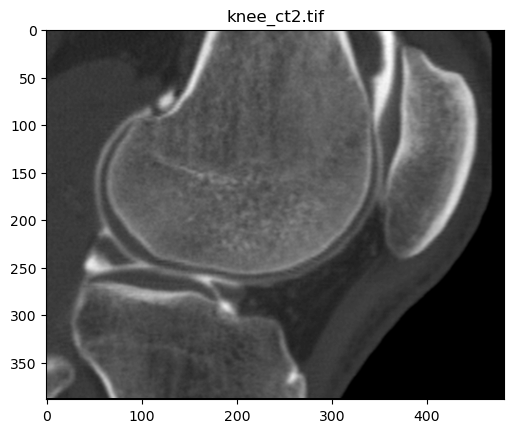

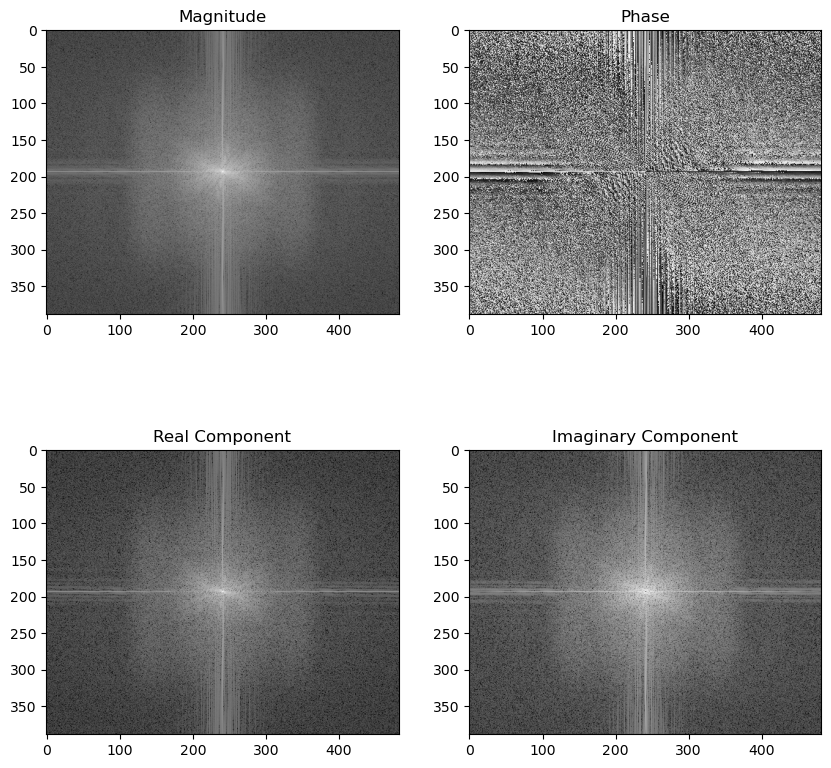

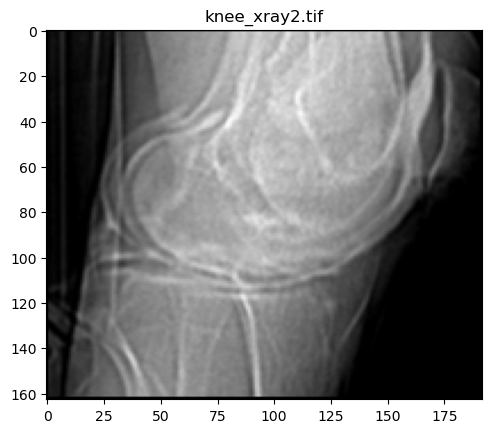

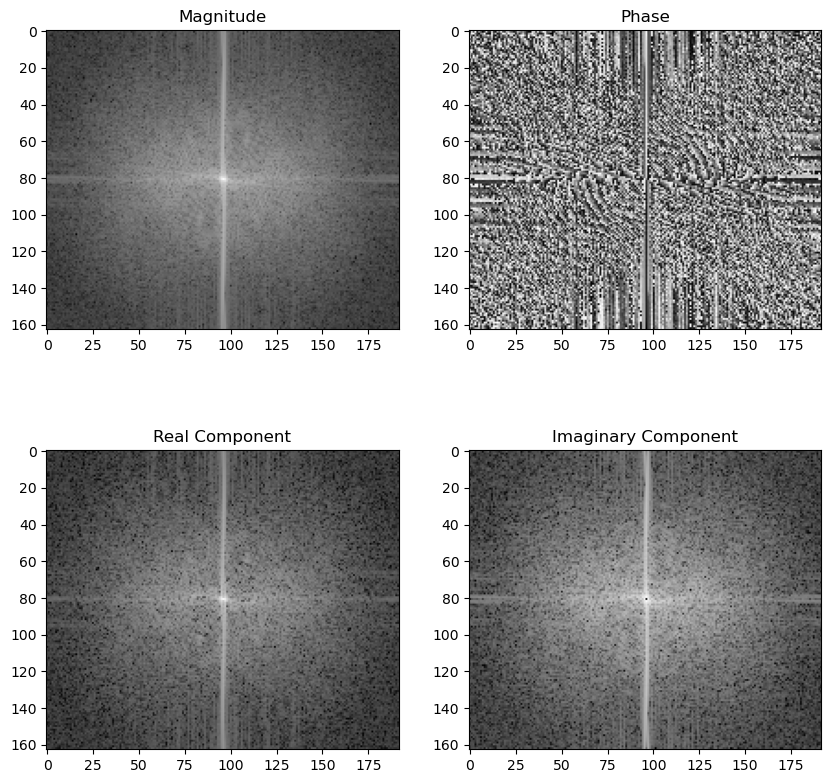

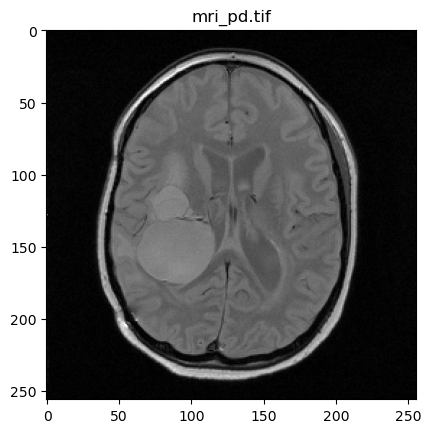

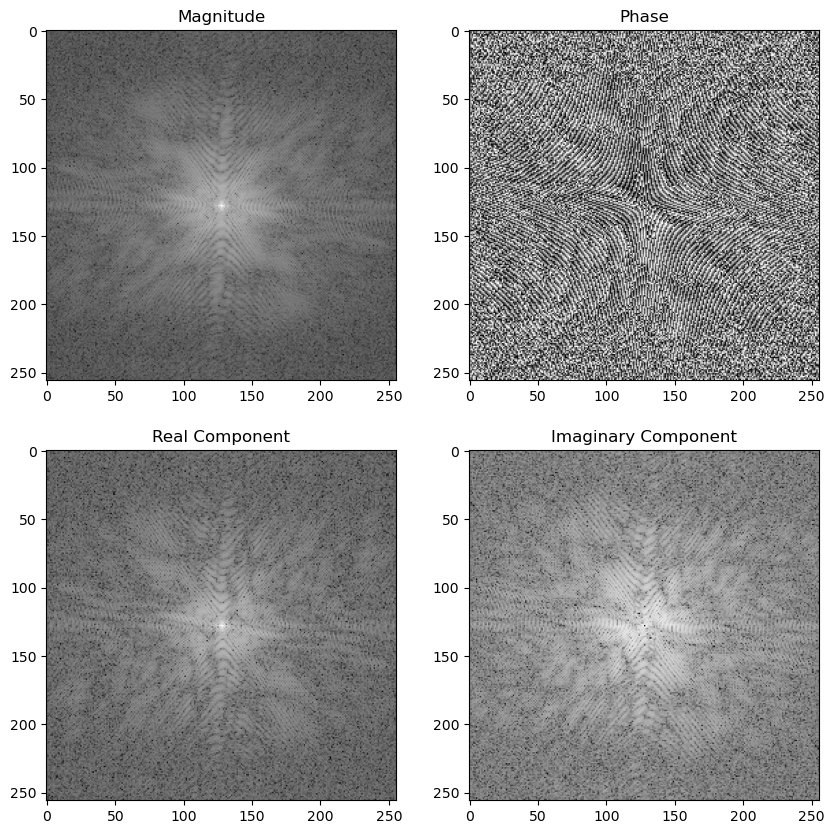

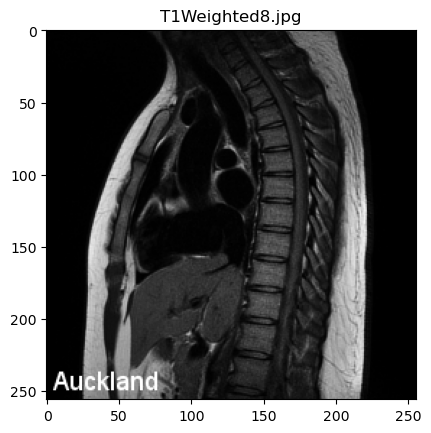

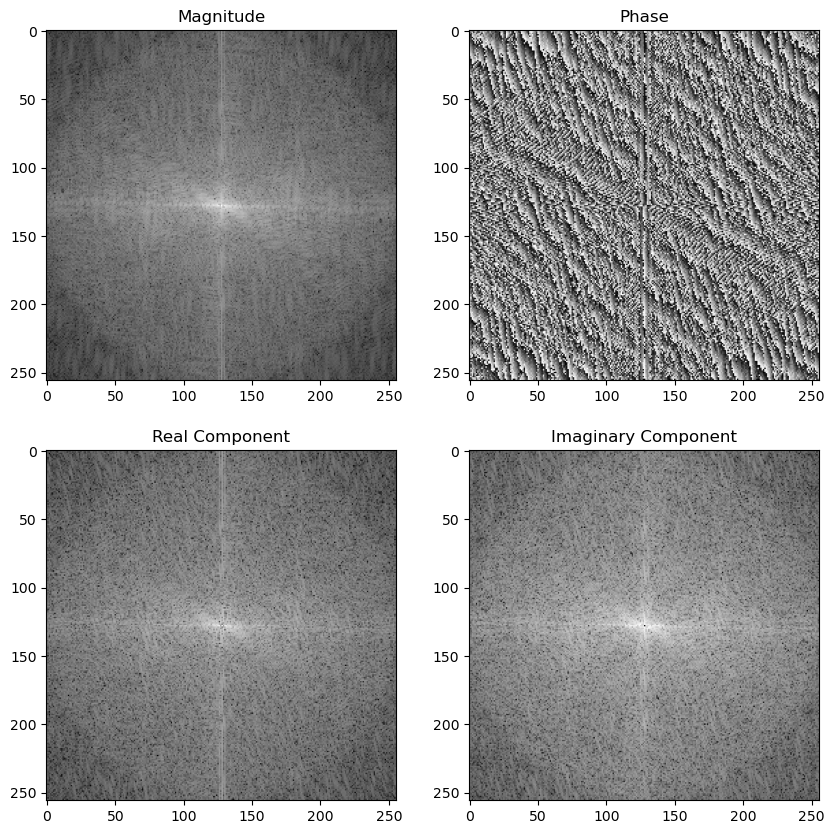

In [62]:
# TODO: Write code here
# Importing PIL library for using the image as an array
from PIL import Image

file_name = ['knee_ct2.tif', 'knee_xray2.tif', 'mri_pd.tif', 'T1Weighted8.jpg']

for i in file_name:
    image = io.imread(os.path.join(data_directory, i))

    # Reading the PNG file as a grayscale
    
    # The array arr will have the image as an array
    arr = np.asarray(image)
    # We need to use imshow specifying that it is a grayscale or it will be rendered as colour
    #plt.imshow(arr, cmap='gray')
    plt.imshow(arr, plt.cm.gray)
    plt.title(i)

    Tlines=np.shape(image)[1]
    Trows=np.shape(image)[1]

    # Let's compute the DFT
    dft = np.fft.fftshift(np.fft.fft2(image))

    # For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
    # We also divide by the maximum response in the image to normalize the image.
    mag = np.log(np.abs(dft)+1);
    mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

    # There is really nothing to do for the phase. Here, the phase has been
    # rescaled to [0, 2*pi). It is absolutely valid to use angle(.) without rescaling.
    phase = (np.angle(dft) + np.pi) / (2*np.pi);

    # For the real component, we again scale by the log and the maximum
    # response in the image. However, we take the absolute value. This changes
    # the interpretation of the image because you make negative values positive.
    real = np.log(np.abs(np.real(dft))+1) / np.log(np.max(np.abs(np.real(dft.ravel())) + 1))
    imag = np.log(np.abs(np.imag(dft))+1) / np.log(np.max(np.abs(np.imag(dft.ravel())) + 1))

    # For imshow, we quickly need to convert everything to float
    mag = mag.astype(np.double)
    phase = phase.astype(np.double)
    real = real.astype(np.double)
    imag = imag.astype(np.double)

    # And plot!
    plt.subplots(2, 2, figsize=(10, 10))
    plt.subplot(2,2,1); plt.imshow(mag, cmap='gray');   plt.title('Magnitude');
    plt.subplot(2,2,2); plt.imshow(phase, cmap='gray'); plt.title('Phase');
    plt.subplot(2,2,3); plt.imshow(real, cmap='gray');  plt.title('Real Component');
    plt.subplot(2,2,4); plt.imshow(imag, cmap='gray');  plt.title('Imaginary Component');
    plt.show()



In [90]:
print('''Question 1: Are the pixels in a DFT image real valued or complex valued?
TODO: Answer question
''')

print('''Question 2: What do the "magnitude" and "phase" components represent?
TODO: Answer question
''')

print('''Question 3: Why do some components need to be scaled?
TODO: Answer question
''')

Question 1: Are the pixels in a DFT image real valued or complex valued?
TODO: Answer question

Question 2: What do the "magnitude" and "phase" components represent?
TODO: Answer question

Question 3: Why do some components need to be scaled?
TODO: Answer question



## 1.) The pixels in the DFT image are real values which are correlated with the magnitude of the Discrete Fourier Transform.

## 2.) The magnitude components of the above images represent the real components that are generated from the Discrete Fourier Transform by taking the square root of the `Real values Squared - Complex Values Squared`, where as the Phase is representative of the change in angle (phase offset) of the complex values generated by the Discrete Fourier Transform.

## 3.) Some components need to be scaled so that we can actually see them, or so that we can view them more easily compared to if they were not scaled.

## Question 2 - Understanding Phase and Magnitude
A Magnetic Resonance (MR) scanner produces images by collecting data in k-space, the colloquial name for the frequency domain. An inverse DFT (i.e. the transform from frequency to space) must be applied to reconstruct the original image. To better understand the importance of both the magnitude and phase when calculating the inverse DFT, we will reconstruct each image with only the magnitude or phase component. For the images `knee_ct2.tif`, `knee_xray2.tif`, `mri-pd.tif` and `T1Weighted8.jpg`:
1. Load each image and compute the DFT
2. Reconstruct the image with only the magnitude information
3. Reconstruct the image with only the phase information

The function `equalize` performs histogram equalization. This can be beneficial for visualizing the magnitude and phase reconstructions.

Answer the following questions:
1. Looking at each image, compare the original image, the magnitude reconstruction, and the phase reconstruction. Waht differences do you see?
2. How does phase contribute to image reconstruction?
3. How does magnitude contribute to image reconstruction?

In [6]:
def equalize(image):
    '''Given an image, equalize the histogram to be easily visualized.
    
    This code is based on this blog post: http://www.janeriksolem.net/histogram-equalization-with-python-and.html
    
    To learn more about histogram equalization, see: https://en.wikipedia.org/wiki/Histogram_equalization
    '''
    
    # Compute CDF
    hist, bins = np.histogram(image.ravel())
    cdf = np.cumsum(hist)
    
    # Now we do linear interpolation
    resampled = np.interp(image.flatten(), bins[:-1], cdf)
    
    # Resample
    new_image = resampled.reshape(image.shape)
    
    return new_image

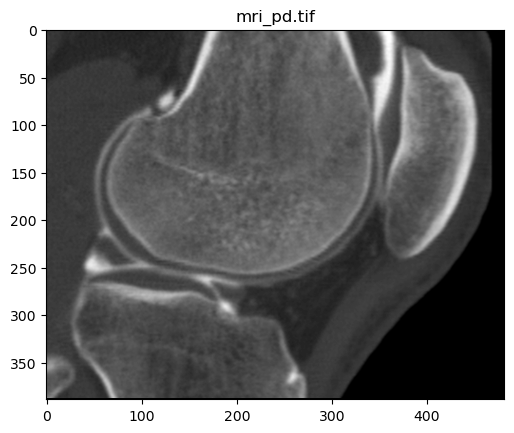

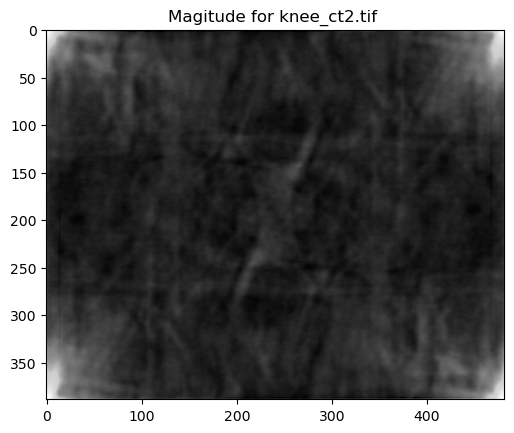

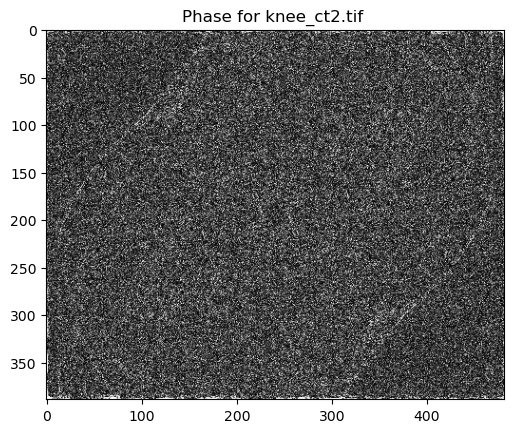

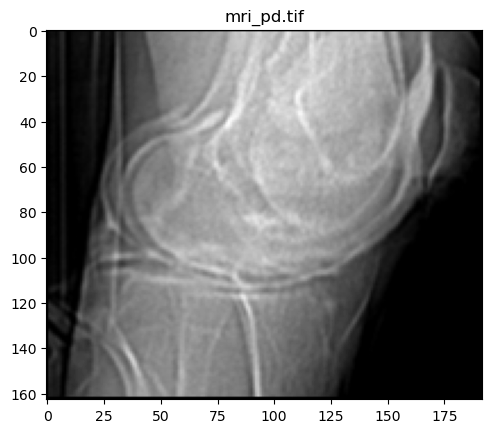

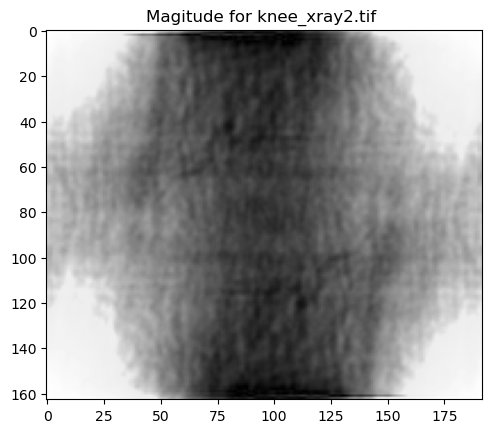

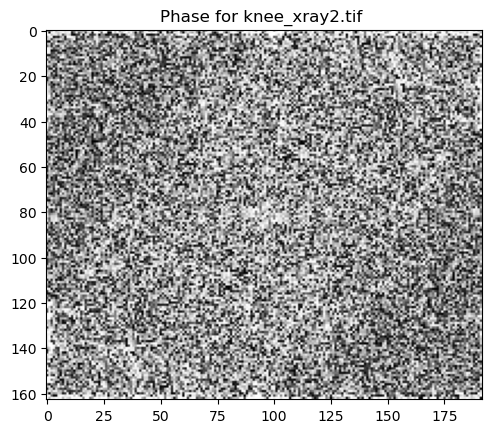

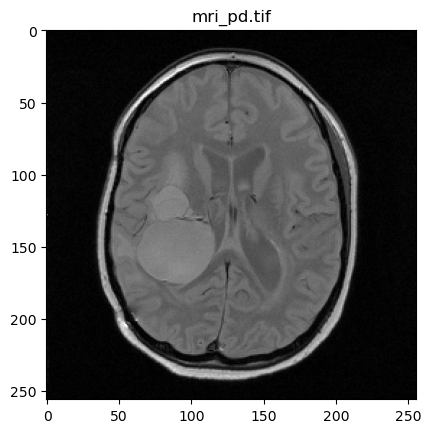

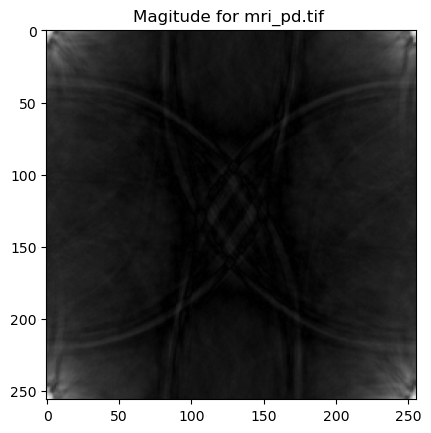

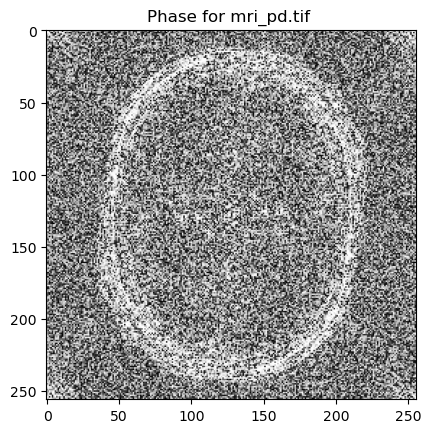

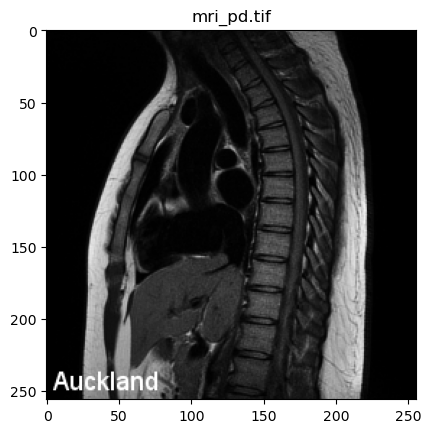

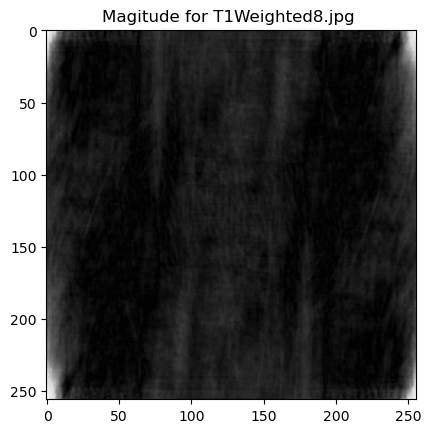

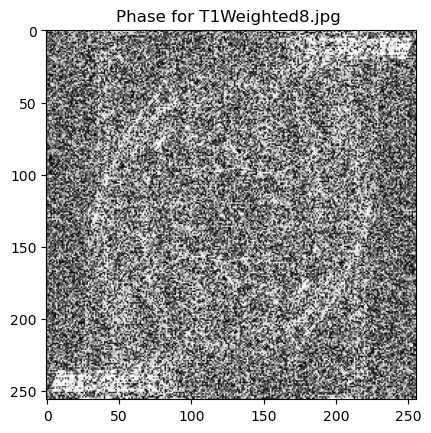

In [89]:
# TODO: Write code here
# This DFT will be too large for visualization so we will need to normalize logarithmically so we import
from matplotlib.colors import LogNorm

file_name = ['knee_ct2.tif', 'knee_xray2.tif', 'mri_pd.tif', 'T1Weighted8.jpg']

for i in file_name:

    # Reading the PNG file as a grayscale
    image = io.imread(os.path.join(data_directory, i))
    # The array arr will have the image as an array
    arr = np.asarray(image)
    # We need to use imshow specifying that it is a grayscale or it will be rendered as colour
    plt.imshow(arr, cmap='gray')
    plt.imshow(arr, plt.cm.gray)
    plt.title('mri_pd.tif')
    plt.show()
    # Tlines=np.shape(image)[1]
    # Trows=np.shape(image)[1]

    # Let's compute the DFT
    dft = np.fft.fft2(image)

    # mag_unshifted = np.fft.ifftshift(dft)
    mag = np.abs(dft)
    angle = np.angle(dft)
    # phase = np.angle(dft)


    # mag_equalized = equalize(mag)

    # phase_equalized = equalize(phase)
    mag_image = np.abs(np.fft.ifft2(mag))
    mag_image = equalize(mag_image)

    angle_image = np.abs(np.fft.ifft2(angle))
    angle_image = equalize(angle_image)
    

   
    plt.imshow(mag_image,cmap='gray')
    plt.title(f'Magitude for {i} ')
    plt.show()

    plt.imshow(angle_image,cmap='gray')
    plt.title(f'Phase for {i} ')


    plt.show()


In [91]:
print('''Question 1: Looking at each image, compare the original image, the magnitude reconstruction, and the phase reconstruction. Waht differences do you see?
TODO: Answer question
''')
print('''Question 2: How does phase contribute to image reconstruction?
TODO: Answer question
''')
print('''Question 3: How does magnitude contribute to image reconstruction?
TODO: Answer question
''')

Question 1: Looking at each image, compare the original image, the magnitude reconstruction, and the phase reconstruction. Waht differences do you see?
TODO: Answer question

Question 2: How does phase contribute to image reconstruction?
TODO: Answer question

Question 3: How does magnitude contribute to image reconstruction?
TODO: Answer question



## 1.) For both the magnitude reconstruction and the phase reconstruction, they have little semblance to the original image in terms of shape, except the brain phase reconstruction which does match the outline of the brain. However one similarity across both magnitude and phase is that the relative intensties of the image slightly aligns with the original image, such as the outline vaugely tracking or light and dark areas slightly correlating with the relative postion on the original image.

## 2.) By interpreting the images above it can be said that phase correlates most with the orientation and the boundaries of the original images, as can be most clearly seen in `mri_pd.tif`

## 3.) By interpreting the images above it can be said that magnitude correlates most with the relative intensities for the original images.

## Question 3 - Reduced Sampling in the Frequency Domain
A current research topic in MR imaging is reconstructing high quality image with fewer samples in k-space (the frequency domain). Reducing the number of samples in k-space can greatly reduce scan time (i.e. the time that the patient is in the MR scanner). Here, we are going to explore what happens when we reconstruct our image with fewer samples in the frequency domain.

Using the image `mri_pd.tif`, do the following:
1. Load the image and display it
2. Calculate the DFT and display the scaled magnitude response
3. Modify the frequency content by removing the smallest 10%, 50%, 90%, 95%, and 99% of the components (by magnitude). This can be accomplished by setting these components to zero
4. Display the magnitude response of the reduced DFT for all five cases
5. Reconstruct images for each of the five DFTs with reduced samples and display the resulting images.

Answer the following questions:
1. As more samples are removed, what changes in the magnitude response?
2. As more samples are removed, what happens to the reconstructed image? You may have to look closely at the ventricles of the brain.

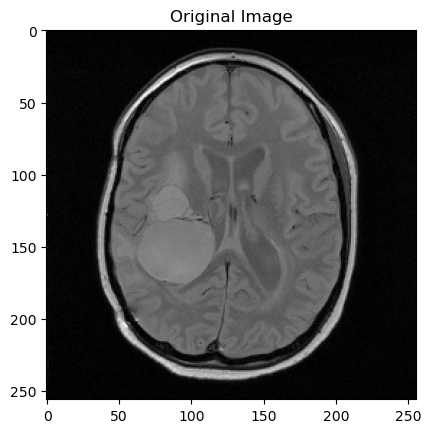

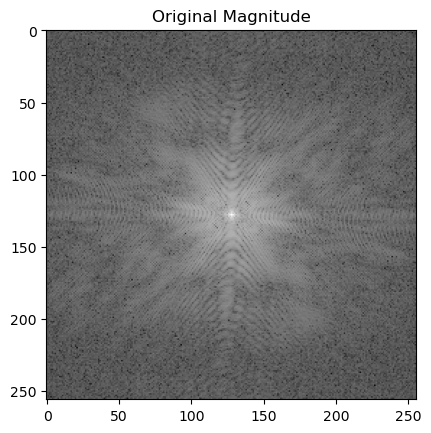

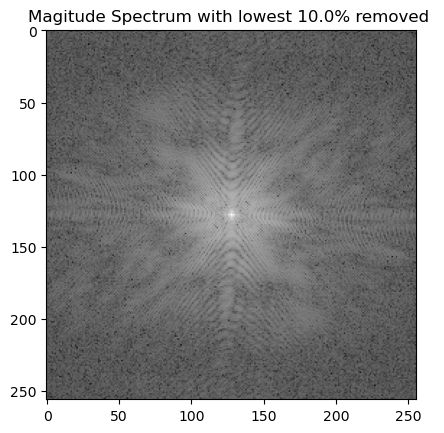

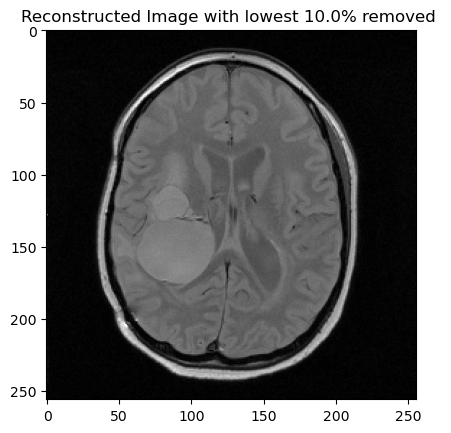

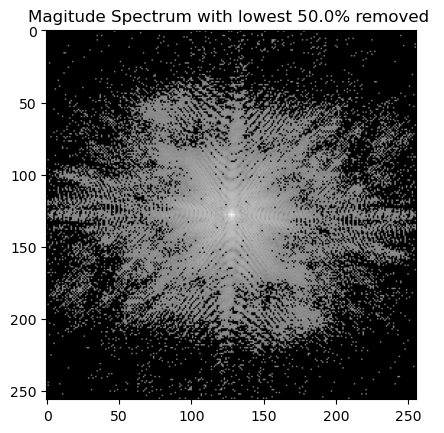

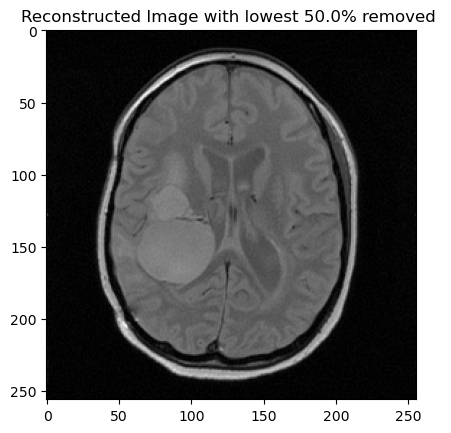

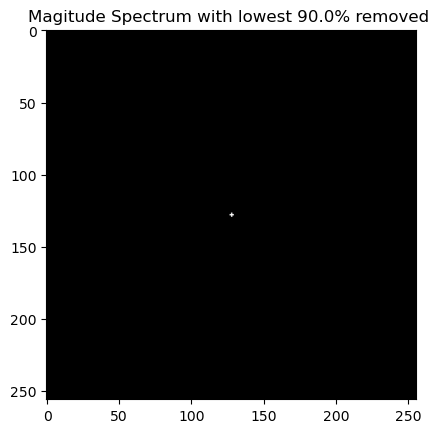

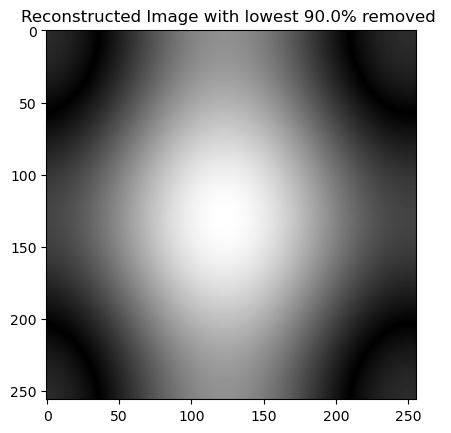

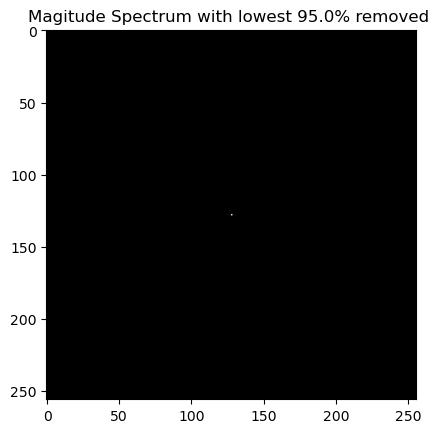

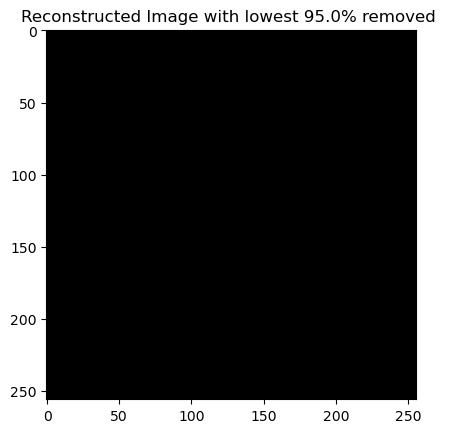

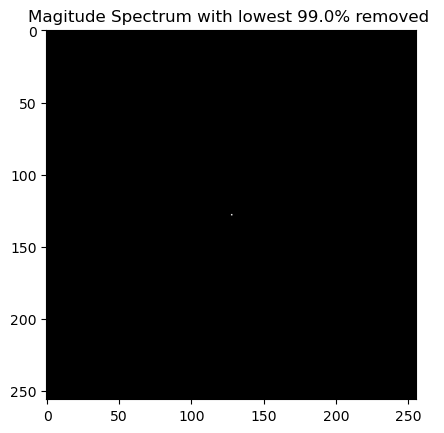

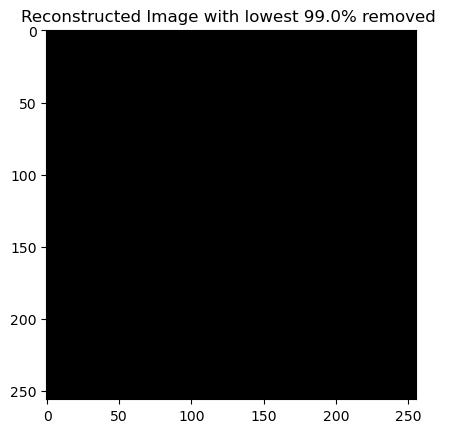

In [106]:
# TODO: Write code here

# Reading the PNG file as a grayscale
image = Image.open('/Users/lucasion/Desktop/BMEN509/BMEN509-UCID30088132/BMEN-509-Lab-2/Report/Data/mri_pd.tif').convert("L")
# Read the image
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()


# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))
# For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
# We also divide by the maximum response in the image to normalize the image.
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

plt.title('Original Magnitude')
plt.imshow(mag, cmap='gray');
plt.show()

# For imshow, we quickly need to convert everything to float
mag = mag.astype(np.double)

percentage = [0.1, 0.5, 0.9, 0.95, 0.99]

for i in percentage:
    
    # Let's compute the DFT
    dft = np.fft.fftshift(np.fft.fft2(image))
    # For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
    # We also divide by the maximum response in the image to normalize the image.
    mag = np.log(np.abs(dft)+1);
    mag = mag / np.log(np.max(np.abs(dft.ravel())+1))


    
    # For imshow, we quickly need to convert everything to float
    mag = mag.astype(np.double)
    max_value = np.amax(mag)
    mag[np.less(mag, max_value*i)] = 0.0
    dft[np.less(mag, max_value*i)] = 0.0
    mag_image = np.abs(np.fft.ifft2(dft))


    plt.title(f'Magitude Spectrum with lowest {i*100}% removed ')
    plt.imshow(mag, cmap='gray');
    plt.show()

    plt.title(f'Reconstructed Image with lowest {i*100}% removed ')
    plt.imshow(mag_image,cmap='gray')
    
    plt.show()

    # And plot!
   


In [92]:
print('''Question 1: As more samples are removed, what changes in the magnitude response?
TODO: Answer question
''')

print('''Question 2: As more samples are removed, what happens to the reconstructed image? You may have to look closely at the ventricles of the brain.
TODO: Answer question
''')

Question 1: As more samples are removed, what changes in the magnitude response?
TODO: Answer question

Question 2: As more samples are removed, what happens to the reconstructed image? You may have to look closely at the ventricles of the brain.
TODO: Answer question



## 1.) As samples are removed the high frequency values on the outside get removed leaving black "specks," as more and more values are removed the image loses more and more frequency values moving towards the center.

## 2.) As more samples are removed the reconstructed image becomes less and less clear ("blurry"), up until a point where it no longer can be interpreted. This can be seen in the images as details start to disappear, with the entire image ultimately becoming black as all the details are removed.

## Question 4 - Frequency Domain Filtering
The image calcs grids.tiff has a periodic artefact that reduces the quality of the image. This is
actually a phantom for detecting breast cancer, which is represented by the six dots in the image.
Our objective is to produce a frequency domain filter which removes these periodic artifacts. Note
that there are six artefacts placed at integer distances from another. If the first artefact appears at
frequency $(0, u)$, the remaining artefacts appear at $(
0, \pm u)$, $(0, \pm 2u)$, and $(0, \pm 3u)$.
For the image `calcs_grids.tiff`, do the following:
1. Load the image and display it
2. Compute the DFT and display the magnitude response
3. Looking at the magnitude response, indicate the location of the artefacts
4. Design a filter in the frequency domain to remove those artefacts
5. Reconstruct the fltered image using an inverse DFT

Answer the following questions:
1. Looking at your magnitude response, where are the artifacts located?
2. Describe how you designed your frequency domain filter.
3. Comparing the original image to the artefact removed image, how well did you do at reducing the unwanted responses?

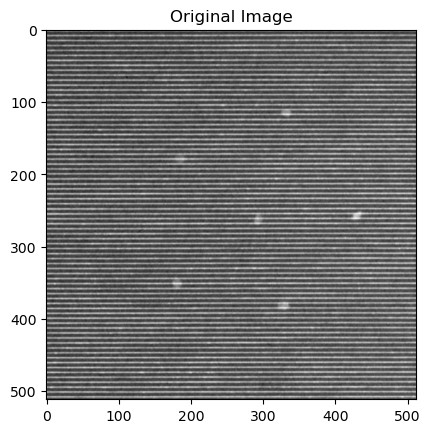

/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_89134/2781683832.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  H = H.astype(np.double)


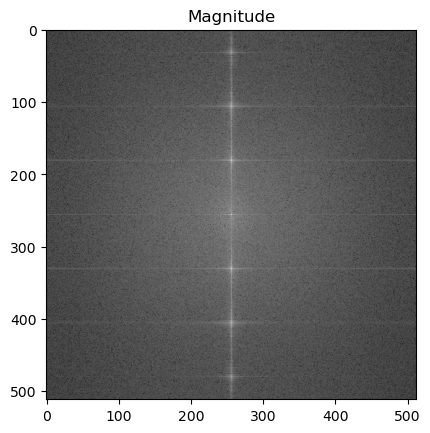

<Figure size 640x480 with 0 Axes>

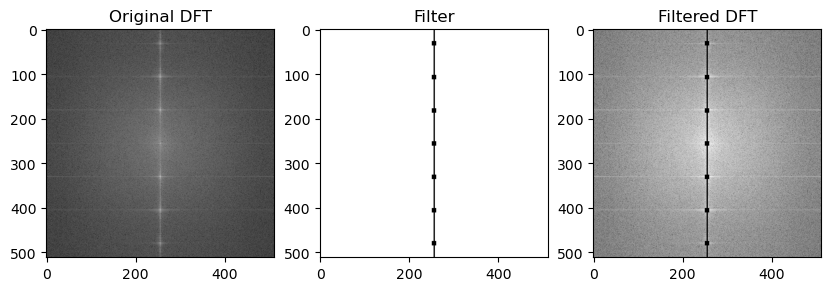

<Figure size 640x480 with 0 Axes>

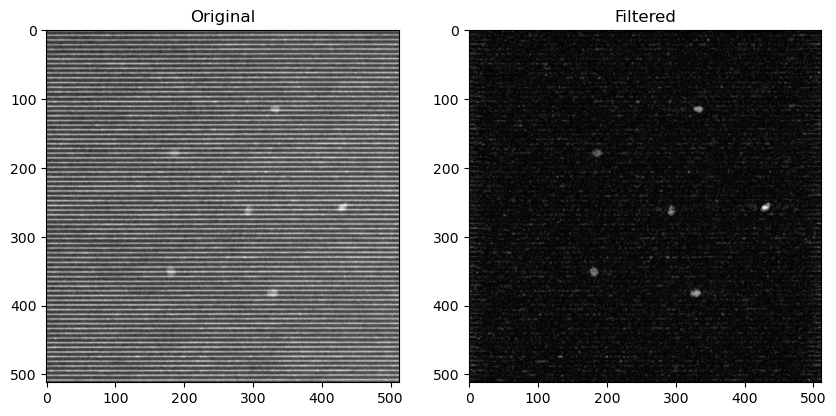

In [104]:
# TODO: Write code here
%matplotlib inline


artefacts = [32, 108, 183, 257, 332, 407, 481]

# Reading the PNG file as a grayscale
image = Image.open('/Users/lucasion/Desktop/BMEN509/BMEN509-UCID30088132/BMEN-509-Lab-2/Report/Data/calcs_grids.tiff').convert("L")
# Read the image
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()

arr = np.asarray(image)
# We need to use imshow specifying that it is a grayscale or it will be rendered as colour
#plt.imshow(arr, cmap='gray')
plt.imshow(arr, plt.cm.gray)
plt.title(i)

Tlines=np.shape(image)[1]
Trows=np.shape(image)[1]

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))
# For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
# We also divide by the maximum response in the image to normalize the image.
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))


# Build a low pass filter
H = np.ones_like(dft)

for row_pos in range(0, H.shape[0]):
    if row_pos in artefacts:
        H[row_pos-5:row_pos+5, 256-5:256+5] = 0
    H[row_pos, 255] = 0;
    H[row_pos, 256] = 0;
    H[row_pos, 257] = 0;


H = H.astype(np.double)
# Apply the filter
new_image_dft = dft * H
new_image_mag = np.log(np.abs(new_image_dft)+1) / np.log(np.max(np.abs(new_image_dft.ravel()) + 1))

# For imshow, we quickly need to convert everything to float
mag = mag.astype(np.double)
plt.imshow(mag,cmap='gray')
plt.title('Magnitude')
plt.show()

# Recovery the image
new_image = np.fft.ifft2(np.fft.fftshift(new_image_dft))
new_image = np.abs(new_image)


# Plot
plt.figure(1)
plt.subplots(1, 3, figsize=(10, 10))
plt.subplot(1, 3, 1); plt.imshow(mag, cmap='gray'); plt.title('Original DFT')
plt.subplot(1, 3, 2); plt.imshow(H, cmap='gray'); plt.title('Filter')
plt.subplot(1, 3, 3); plt.imshow(new_image_mag, cmap='gray'); plt.title('Filtered DFT')
plt.show()


plt.figure(2)
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1); plt.imshow(image, cmap='gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(new_image, cmap='gray'); plt.title('Filtered')
plt.show()



In [93]:
print('''Question 1: Looking at your magnitude response, where are the artifacts located?
TODO: Answer question
''')

print('''Question 2: Describe how you designed your frequency domain filter.
TODO: Answer question
''')

print('''Question 3: Comparing the original image to the artefact removed image, how well did you do at reducing the unwanted responses?
TODO: Answer question
''')

Question 1: Looking at your magnitude response, where are the artifacts located?
TODO: Answer question

Question 2: Describe how you designed your frequency domain filter.
TODO: Answer question

Question 3: Comparing the original image to the artefact removed image, how well did you do at reducing the unwanted responses?
TODO: Answer question



## 1.) By switching to `%matplotlib qt` I was able to plot the easily interpretable shifted magnitude response of the frequencies as seen above. This allowed me to identify the artifacts centerpoints being located at `[(256,32),(256,108), (256,183), (256,257), (256,332), (256,407), (256,481)]` respectively.

## 2.) To design the frequncy domain filter I created an array of ones the resembles the size of the Discrete Fourier Transform Dimensions. I then created an array for the center point of each artifact, as discussed in question 1. I then proceeded to iterate through the numpy matrix corresponding to the DFT. When I arrived at each artifact I masked it with a box of size `[10,10]` with the values 0, as well as plotting a 0 on the center vertical line at 256, and one pixel to each the left and right of the center line corresponding to 0. I then multiplied the DFT by my filter to obtain a filtered new dft.

## 3.) I would say that the filter did quite well at removing unwanted responses. Compared to the original image, the filtered image does not have the horizontal striped lines, and it clearly displays the 6 dots as intended. There are some artefacts but they are very muted and not really interfering with the interpretation of the image.

### Conclusion
TODO: Write your conclusion here

## In this lab we spent a lot of time getting familar with Fourier Transforms. Throughout our exploration of Fourier Transforms we investigated various components such as the Real, Imagniary, Magnitude, and Phase Components. The exercises in this lab allowed us to explore differing sections of the Fourier Transform. We first began by visualizing the frequency domain, next by focusing on understanding phase and magnitude components of the Fourier transform, followed by reducing sampling in the frequency domain and how that affects an images quality, and concluded with Frequency domain filtering and how that can be utilized to remove 6 artifacts from an image. Overall this lab allowed us to build up some skills regarding Fourier Transform's, and to engage with the implications of it.